In [111]:
import pandas as pd

df = pd.read_csv('spotify_history raw.csv')

In [112]:
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [113]:
df.shape

(149860, 11)

In [114]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [116]:
top_artistas = df.groupby('artist_name').size().sort_values(ascending=False).head(10)
top_artistas_df = top_artistas.reset_index()
top_artistas_df.columns = ['Top 10 Artistas', 'Total Reproducciones']
top_artistas_df

,Top 10 Artistas,Total Reproducciones
0,The Beatles,13621
1,The Killers,6878
2,John Mayer,4855
3,Bob Dylan,3814
4,Paul McCartney,2697
5,Led Zeppelin,2482
6,Johnny Cash,2478
7,The Rolling Stones,2390
8,Radiohead,2305
9,The Black Keys,2231


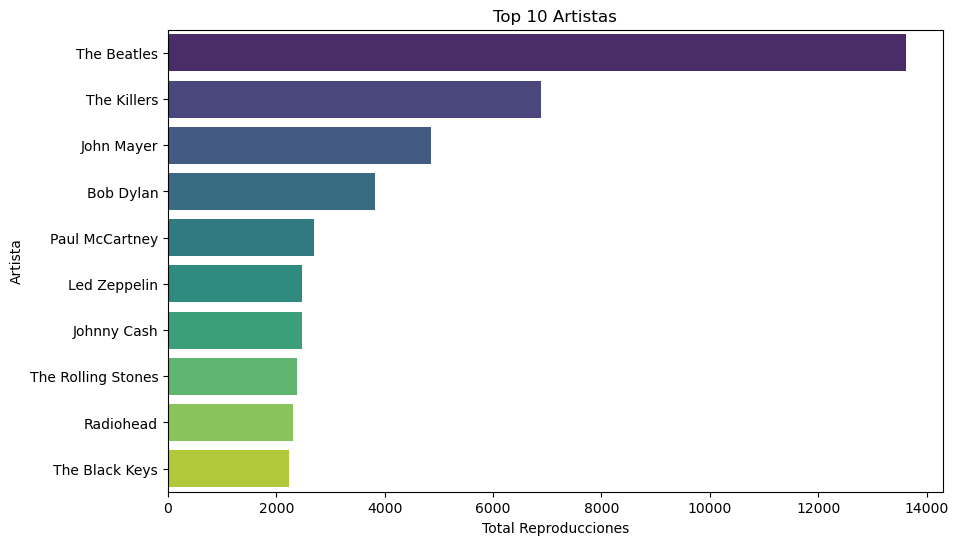

In [117]:
# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Total Reproducciones', y='Top 10 Artistas', data=top_artistas_df, palette='viridis', legend=False)
plt.title('Top 10 Artistas')
plt.xlabel('Total Reproducciones')
plt.ylabel('Artista')
plt.show()

In [118]:
top_cancion = df.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(1)
top_cancion_df = top_cancion.reset_index()
top_cancion_df.columns = ['Canción', 'Tiempo Total Reproducido (ms)']
top_cancion_df['Tiempo Total Reproducido (min)'] = top_cancion_df['Tiempo Total Reproducido (ms)'] / 60000
top_cancion_df[['Canción', 'Tiempo Total Reproducido (min)']]

,Canción,Tiempo Total Reproducido (min)
0,Ode To The Mets,1123.859667


In [119]:
# Total reproducciones
plataforma_reproducciones = df.groupby('platform').size().reset_index()
plataforma_reproducciones.columns = ['Plataforma', 'Total Reproducciones']

# Tiempo total reproducido
plataforma_tiempo = df.groupby('platform')['ms_played'].sum().reset_index()
plataforma_tiempo.columns = ['Plataforma', 'Tiempo Total Reproducido (min)']
plataforma_tiempo['Tiempo Total Reproducido (min)'] = plataforma_tiempo['Tiempo Total Reproducido (min)'] / 60000

# Unimos en una sola tabla
plataforma_df = pd.merge(plataforma_reproducciones, plataforma_tiempo, on='Plataforma')
plataforma_df

,Plataforma,Total Reproducciones,Tiempo Total Reproducido (min)
0,android,139821,291479.919633
1,cast to device,3898,12116.270000
2,iOS,3049,8382.518183
3,mac,1176,4198.482483
4,web player,225,418.935433
5,windows,1691,3896.056517


In [120]:
skipped_total = df['skipped'].sum()
skipped_porcentaje = (skipped_total / len(df)) * 100

skipped_df = pd.DataFrame({
    'Total Canciones Saltadas': [skipped_total],
    'Porcentaje del Total (%)': [skipped_porcentaje]
})

skipped_df

,Total Canciones Saltadas,Porcentaje del Total (%)
0,7869,5.250901


In [121]:
# Convertimos ts a datetime (si no lo has hecho)
df['ts'] = pd.to_datetime(df['ts'])
df['Día de la Semana'] = df['ts'].dt.day_name()

# Contamos reproducciones por día y ordenamos de mayor a menor
top_dias = df['Día de la Semana'].value_counts().reset_index()
top_dias.columns = ['Día de la Semana', 'Total Reproducciones']

# Mostramos el ranking
top_dias

,Día de la Semana,Total Reproducciones
0,Friday,25646
1,Wednesday,23406
2,Thursday,21401
3,Monday,21031
4,Tuesday,20705
5,Saturday,19397
6,Sunday,18274


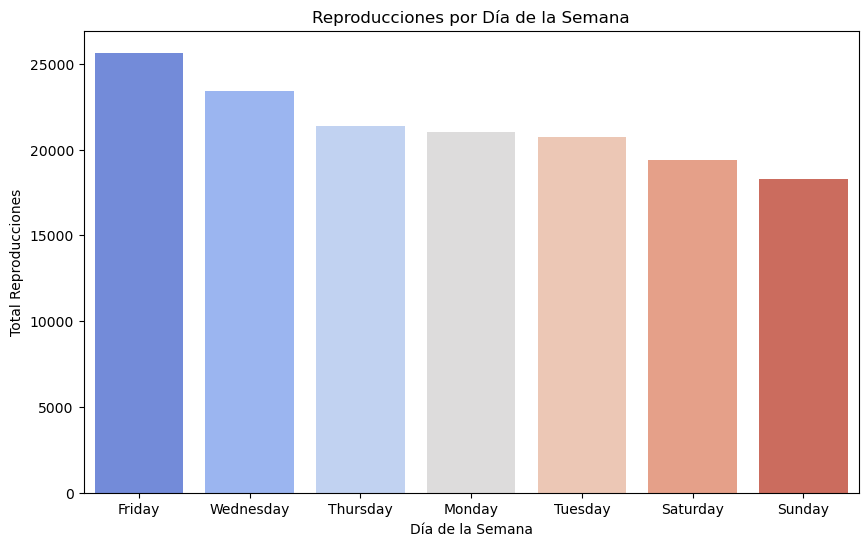

In [122]:

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Día de la Semana', y='Total Reproducciones', data=top_dias, palette='coolwarm', legend=False)
plt.title('Reproducciones por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total Reproducciones')
plt.show()

In [123]:
# Contamos reproducciones por shuffle activado/desactivado
shuffle_counts = df['shuffle'].value_counts().reset_index()
shuffle_counts.columns = ['Shuffle', 'Total Reproducciones']

# Convertimos booleanos a texto para que se vea mejor en el gráfico
shuffle_counts['Shuffle'] = shuffle_counts['Shuffle'].map({True:'Activado', False:'Desactivado'})
shuffle_counts

,Shuffle,Total Reproducciones
0,Activado,111583
1,Desactivado,38277


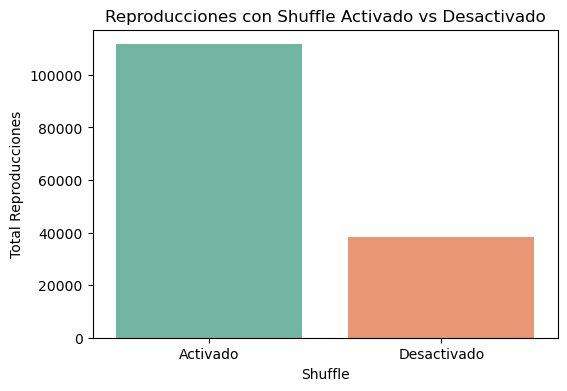

In [124]:
# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x='Shuffle', y='Total Reproducciones', data=shuffle_counts, palette='Set2', legend=False)
plt.title('Reproducciones con Shuffle Activado vs Desactivado')
plt.xlabel('Shuffle')
plt.ylabel('Total Reproducciones')
plt.show()

In [125]:
relacion_df = pd.crosstab(df['reason_start'], df['reason_end']).reset_index()
relacion_df

reason_end,reason_start,appload,backbtn,clickrow,endplay,fwdbtn,logout,nextbtn,popup,reload,remote,trackdone,trackerror,unexpected-exit,unexpected-exit-while-paused,unknown
0,appload,5,41,0,768,598,164,0,2,0,7,2055,0,5,67,17
1,autoplay,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,backbtn,0,451,1,129,728,75,0,0,0,3,771,0,1,38,7
3,clickrow,0,20,19,5217,680,298,6,0,0,62,4605,0,20,261,36
4,endplay,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
5,fwdbtn,1,1418,0,1028,42818,687,0,0,0,34,7414,0,29,317,39
6,nextbtn,0,1,4,0,0,0,13,0,1,0,0,0,0,0,2
7,playbtn,0,1,0,538,338,29,0,0,0,10,522,0,3,13,4
8,popup,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0
9,remote,0,0,0,95,38,26,0,0,0,27,237,0,4,5,45


In [126]:
top_album = df.groupby('album_name').size().sort_values(ascending=False).head(1)
top_album_df = top_album.reset_index()
top_album_df.columns = ['Álbum más reproducido', 'Total Reproducciones']
top_album_df

,Álbum más reproducido,Total Reproducciones
0,The Beatles,2063


In [127]:
#1️⃣ Limpiar y preparar datos
df['ts'] = pd.to_datetime(df['ts'])
df['Duración (min)'] = df['ms_played'] / 60000
df['Día de la Semana'] = df['ts'].dt.day_name()
df['Hora del Día'] = df['ts'].dt.hour
df['Shuffle'] = df['shuffle'].map({True:'Sí', False:'No'})

# Columnas útiles para exportar
cols_limpias = ['track_name','artist_name','album_name','platform','Duración (min)','Día de la Semana','Hora del Día','Shuffle','skipped']
df_limpio = df[cols_limpias]

# 2️⃣ Crear tablas de resumen

top_artistas = df.groupby('artist_name').size().sort_values(ascending=False).head(10).reset_index()
top_artistas.columns = ['Artista', 'Total Reproducciones']

top_canciones = df.groupby('track_name')['Duración (min)'].sum().sort_values(ascending=False).head(10).reset_index()
top_canciones.columns = ['Canción', 'Duración Total (min)']

top_albumes = df.groupby('album_name').size().sort_values(ascending=False).head(10).reset_index()
top_albumes.columns = ['Álbum', 'Total Reproducciones']

plataformas = df.groupby('platform')['Duración (min)'].sum().reset_index()
plataformas.columns = ['Plataforma', 'Total Duración (min)']

shuffle_tabla = df['Shuffle'].value_counts().reset_index()
shuffle_tabla.columns = ['Shuffle', 'Total Reproducciones']


# 3️⃣ KPIs para dashboard

total_canciones = df.shape[0]
total_horas = df['Duración (min)'].sum() / 60
artista_fav = top_artistas.iloc[0,0]
cancion_fav = top_canciones.iloc[0,0]
dia_top = df['Día de la Semana'].value_counts().idxmax()
shuffle_pct = df['Shuffle'].value_counts(normalize=True).mul(100).round(2).to_dict()

kpis = pd.DataFrame({
    'KPI': ['Total Canciones', 'Total Horas Reproducidas', 'Artista Favorito', 'Canción Favorita', 'Día de la Semana Más Escuchado', 'Shuffle Sí (%)', 'Shuffle No (%)'],
    'Valor': [total_canciones, round(total_horas,2), artista_fav, cancion_fav, dia_top, shuffle_pct.get('Sí',0), shuffle_pct.get('No',0)]
})


# 4️⃣ Exportar a Excel

with pd.ExcelWriter('Spotify_Resumen.xlsx') as writer:
    df_limpio.to_excel(writer, sheet_name='Datos Limpios', index=False)
    top_artistas.to_excel(writer, sheet_name='Resumen', index=False, startrow=0)
    top_canciones.to_excel(writer, sheet_name='Resumen', index=False, startrow=12)
    top_albumes.to_excel(writer, sheet_name='Resumen', index=False, startrow=25)
    plataformas.to_excel(writer, sheet_name='Resumen', index=False, startrow=38)
    shuffle_tabla.to_excel(writer, sheet_name='Resumen', index=False, startrow=52)
    kpis.to_excel(writer, sheet_name='Dashboard', index=False)